In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

 99% 1.82G/1.83G [00:15<00:00, 137MB/s]
100% 1.83G/1.83G [00:15<00:00, 125MB/s]


In [ ]:
!unzip stanford-car-dataset-by-classes-folder.zip

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import cv2
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image, display
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
train_path = "/car_data/car_data/train"
test_path = "/car_data/car_data/train"
train_path

'/car_data/car_data/train'

In [5]:
import pathlib
data_dir = pathlib.Path('./car_data/car_data/train')

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

8144

In [6]:
ClassNames = pd.read_csv("./names.csv")

In [ ]:
path = pathlib.Path('./car_data/car_data/train')
Bent = list(data_dir.glob('Bentley Arnage Sedan 2009/*'))

for image_path in Bent[:5]:
    display(Image(str(image_path)))

In [9]:
IMAGE_SIZE = 224
BATCH_SIZE = 64
dataset_dir = './car_data/car_data/train' #base_directory having training data set

In [10]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_dir,
  labels="inferred",
  label_mode="categorical",
  class_names=None,
  color_mode="rgb",
  batch_size=BATCH_SIZE,
  image_size=(IMAGE_SIZE,IMAGE_SIZE),
  seed=123,
  validation_split=0.2,
  subset="training",
  )

Found 8144 files belonging to 196 classes.
Using 6516 files for training.


In [11]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_dir,
  labels="inferred",
  label_mode="categorical",
  class_names=None,
  color_mode="rgb",
  batch_size=BATCH_SIZE,
  image_size=(IMAGE_SIZE,IMAGE_SIZE),
  seed=123,
  validation_split=0.2,
  subset="validation",
  )

Found 8144 files belonging to 196 classes.
Using 1628 files for validation.


In [12]:
image_batch_train, label_batch_train = next(iter(train_dataset))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 196)


In [ ]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])

In [36]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# The pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
numclasses= len(CLASS_NAMES)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(numclasses, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [39]:
history = model.fit(
      train_dataset,
      #steps_per_epoch=steps_per_epoch,
      epochs=50,
      validation_data=val_dataset)
      #validation_steps=val_steps_per_epoch)

Epoch 1/50
102/102 [==============================] - 20s 191ms/step - loss: 3.9490 - acc: 0.2075 - val_loss: 5.4310 - val_acc: 0.0092
Epoch 2/50
102/102 [==============================] - 20s 192ms/step - loss: 2.2934 - acc: 0.5173 - val_loss: 6.0366 - val_acc: 0.0166
Epoch 3/50
102/102 [==============================] - 20s 191ms/step - loss: 1.0250 - acc: 0.7747 - val_loss: 7.2587 - val_acc: 0.0203
Epoch 4/50
102/102 [==============================] - 20s 192ms/step - loss: 0.3957 - acc: 0.9167 - val_loss: 9.0202 - val_acc: 0.0227
Epoch 5/50
102/102 [==============================] - 20s 192ms/step - loss: 0.2167 - acc: 0.9552 - val_loss: 10.6728 - val_acc: 0.0154
Epoch 6/50
102/102 [==============================] - 19s 191ms/step - loss: 0.1396 - acc: 0.9704 - val_loss: 12.2833 - val_acc: 0.0166
Epoch 7/50
102/102 [==============================] - 20s 192ms/step - loss: 0.1042 - acc: 0.9768 - val_loss: 11.7648 - val_acc: 0.0240
Epoch 8/50
102/102 [==============================] 

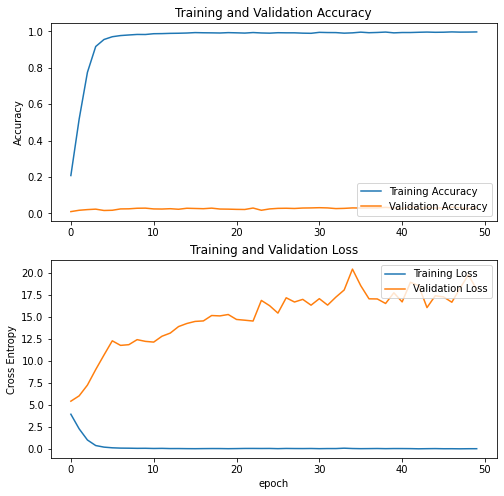

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [48]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.layers import Dropout
numclasses= len(CLASS_NAMES)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(numclasses, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [49]:
history = model.fit(
      train_dataset,
      #steps_per_epoch=steps_per_epoch,
      epochs=50,
      validation_data=val_dataset)
      #validation_steps=val_steps_per_epoch)

Epoch 1/50
102/102 [==============================] - 21s 195ms/step - loss: 8.7885 - acc: 0.0080 - val_loss: 5.2674 - val_acc: 0.0049
Epoch 2/50
102/102 [==============================] - 20s 193ms/step - loss: 5.2359 - acc: 0.0112 - val_loss: 5.2269 - val_acc: 0.0111
Epoch 3/50
102/102 [==============================] - 20s 193ms/step - loss: 5.0900 - acc: 0.0258 - val_loss: 5.1979 - val_acc: 0.0147
Epoch 4/50
102/102 [==============================] - 20s 193ms/step - loss: 4.7750 - acc: 0.0623 - val_loss: 5.2253 - val_acc: 0.0166
Epoch 5/50
102/102 [==============================] - 20s 193ms/step - loss: 4.2437 - acc: 0.1306 - val_loss: 5.3149 - val_acc: 0.0270
Epoch 6/50
102/102 [==============================] - 20s 194ms/step - loss: 3.4773 - acc: 0.2514 - val_loss: 5.6616 - val_acc: 0.0307
Epoch 7/50
102/102 [==============================] - 20s 194ms/step - loss: 2.5762 - acc: 0.4138 - val_loss: 6.0595 - val_acc: 0.0338
Epoch 8/50
102/102 [==============================] - 2

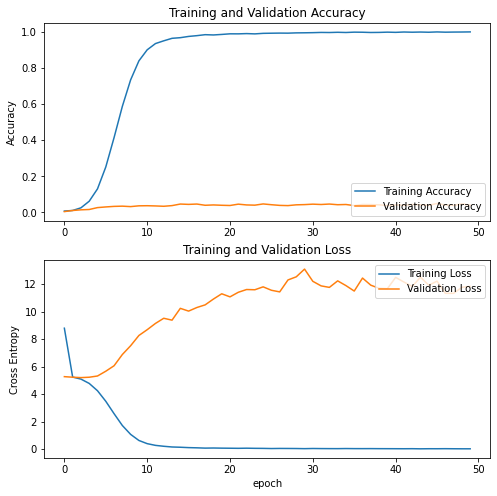

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [52]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2
numclasses= len(CLASS_NAMES)
factor = 0.0001
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),kernel_regularizer=l2(factor), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),kernel_regularizer=l2(factor), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=l2(factor), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=l2(factor), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512,kernel_regularizer=l2(factor), activation='relu'))
model.add(layers.Dense(numclasses, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [53]:
history = model.fit(
      train_dataset,
      #steps_per_epoch=steps_per_epoch,
      epochs=50,
      validation_data=val_dataset)
      #validation_steps=val_steps_per_epoch)

Epoch 1/50
102/102 [==============================] - 22s 200ms/step - loss: 9.1801 - acc: 0.0035 - val_loss: 5.4061 - val_acc: 0.0080
Epoch 2/50
102/102 [==============================] - 20s 198ms/step - loss: 5.4231 - acc: 0.0069 - val_loss: 5.3865 - val_acc: 0.0129
Epoch 3/50
102/102 [==============================] - 20s 197ms/step - loss: 5.3569 - acc: 0.0124 - val_loss: 5.3115 - val_acc: 0.0166
Epoch 4/50
102/102 [==============================] - 20s 197ms/step - loss: 5.2110 - acc: 0.0242 - val_loss: 5.2445 - val_acc: 0.0240
Epoch 5/50
102/102 [==============================] - 20s 197ms/step - loss: 4.9342 - acc: 0.0542 - val_loss: 5.2425 - val_acc: 0.0233
Epoch 6/50
102/102 [==============================] - 20s 197ms/step - loss: 4.4221 - acc: 0.1122 - val_loss: 5.2906 - val_acc: 0.0338
Epoch 7/50
102/102 [==============================] - 20s 198ms/step - loss: 3.6150 - acc: 0.2466 - val_loss: 5.6539 - val_acc: 0.0369
Epoch 8/50
102/102 [==============================] - 2

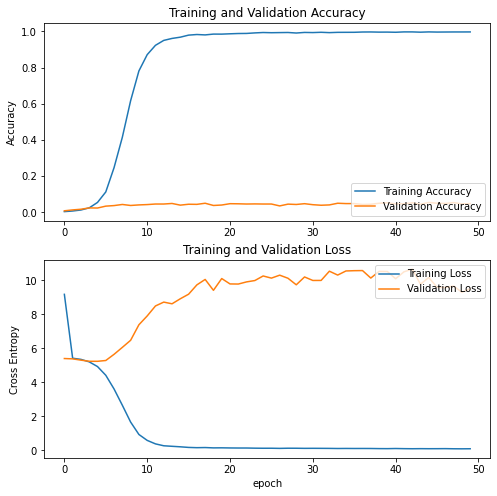

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()